<a href="https://colab.research.google.com/github/JakeLi2001/CTP-Data-Science-Cohort-8/blob/main/Week-12-Neural-Networks/a_most_simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Layers for our neural networks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
# A pretrained model for transfer learning
from keras.models import Model
from keras.applications import vgg19

# Our normal python data science stack you've come to know and love
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets

print(tf.__version__)

2.12.0


In [3]:
# the same prep we did for titanic earlier in the semester 
df = pd.read_csv('https://raw.githubusercontent.com/CUNYTechPrep/2020-fall-data-science/master/Week5-RandomForest/data/titanic.csv')
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df = pd.get_dummies(df, columns=['sex', 'pclass', 'embarked'], drop_first=True)
df.head()

,passengerid,survived,name,age,sibsp,parch,ticket,fare,cabin,sex_male,pclass_2,pclass_3,embarked_Q,embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1,0,1


In [5]:
selected_features = ['fare', 'age', 'sex_male', 'pclass_2', 'pclass_3', 'sibsp', 'parch', 'embarked_Q', 'embarked_S']
df['age'] = df['age'].fillna(-999)

X = df[selected_features]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

print('Lenght of our Training data:', X_train.shape, '\nLength of our Testing data:', y_test.shape)
df.head()

Lenght of our Training data: (712, 9) 
Length of our Testing data: (179,)


,passengerid,survived,name,age,sibsp,parch,ticket,fare,cabin,sex_male,pclass_2,pclass_3,embarked_Q,embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1,0,1


In [7]:
model = tf.keras.models.Sequential([                
  tf.keras.layers.Dense(9, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid') 
  ])

# note that the compile function operates "inplace," we don't return the model when we're done, similar to the fit method from sklearn
model.compile(  
    optimizer=tf.keras.optimizers.Adam(),   
    loss='binary_crossentropy', 
    metrics=['accuracy'])

In [14]:
x = X_train.iloc[0].values
print(x.shape, len(x))
print(x)

x = x.reshape(-1, 9)
print(x.shape)
print(x)

(9,) 9
[153.4625  38.       1.       0.       0.       0.       1.       0.
   1.    ]
(1, 9)
[[153.4625  38.       1.       0.       0.       0.       1.       0.
    1.    ]]


In [15]:
z = model(x, training=False)
p = model.predict(x)
print(z, p)

1/1 [==============================] - 0s 139ms/step
tf.Tensor([[0.07936948]], shape=(1, 1), dtype=float32) [[0.07936948]]


In [16]:
# model.compile??
# tf.keras.optimizers.Optimizer??
# tf.keras.losses??
# tf.keras.layers??
# tf.keras.metrics.BinaryAccuracy,
# tf.keras.metrics.CategoricalAccuracy,
# tf.keras.metrics.SparseCategoricalAccuracy

In [17]:
epochs = 30
history = model.fit(X_train, y_train, 
          epochs=epochs, 
          validation_split=0.1)

Epoch 1/30
20/20 [==============================] - 3s 15ms/step - loss: 3.2669 - accuracy: 0.6562 - val_loss: 2.9674 - val_accuracy: 0.6111
Epoch 2/30
20/20 [==============================] - 0s 5ms/step - loss: 1.5871 - accuracy: 0.6234 - val_loss: 1.8655 - val_accuracy: 0.6806
Epoch 3/30
20/20 [==============================] - 0s 5ms/step - loss: 0.9618 - accuracy: 0.6547 - val_loss: 0.7359 - val_accuracy: 0.6806
Epoch 4/30
20/20 [==============================] - 0s 5ms/step - loss: 0.8192 - accuracy: 0.6719 - val_loss: 0.6494 - val_accuracy: 0.6528
Epoch 5/30
20/20 [==============================] - 0s 5ms/step - loss: 0.7512 - accuracy: 0.6812 - val_loss: 0.7157 - val_accuracy: 0.6944
Epoch 6/30
20/20 [==============================] - 0s 5ms/step - loss: 0.7417 - accuracy: 0.6859 - val_loss: 1.1717 - val_accuracy: 0.6806
Epoch 7/30
20/20 [==============================] - 0s 5ms/step - loss: 0.7013 - accuracy: 0.6969 - val_loss: 0.6675 - val_accuracy: 0.5556
Epoch 8/30
20/20 [=

In [18]:
# now we evaluate our model
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 5ms/step - loss: 0.5408 - accuracy: 0.7877


[0.5408150553703308, 0.7877094745635986]

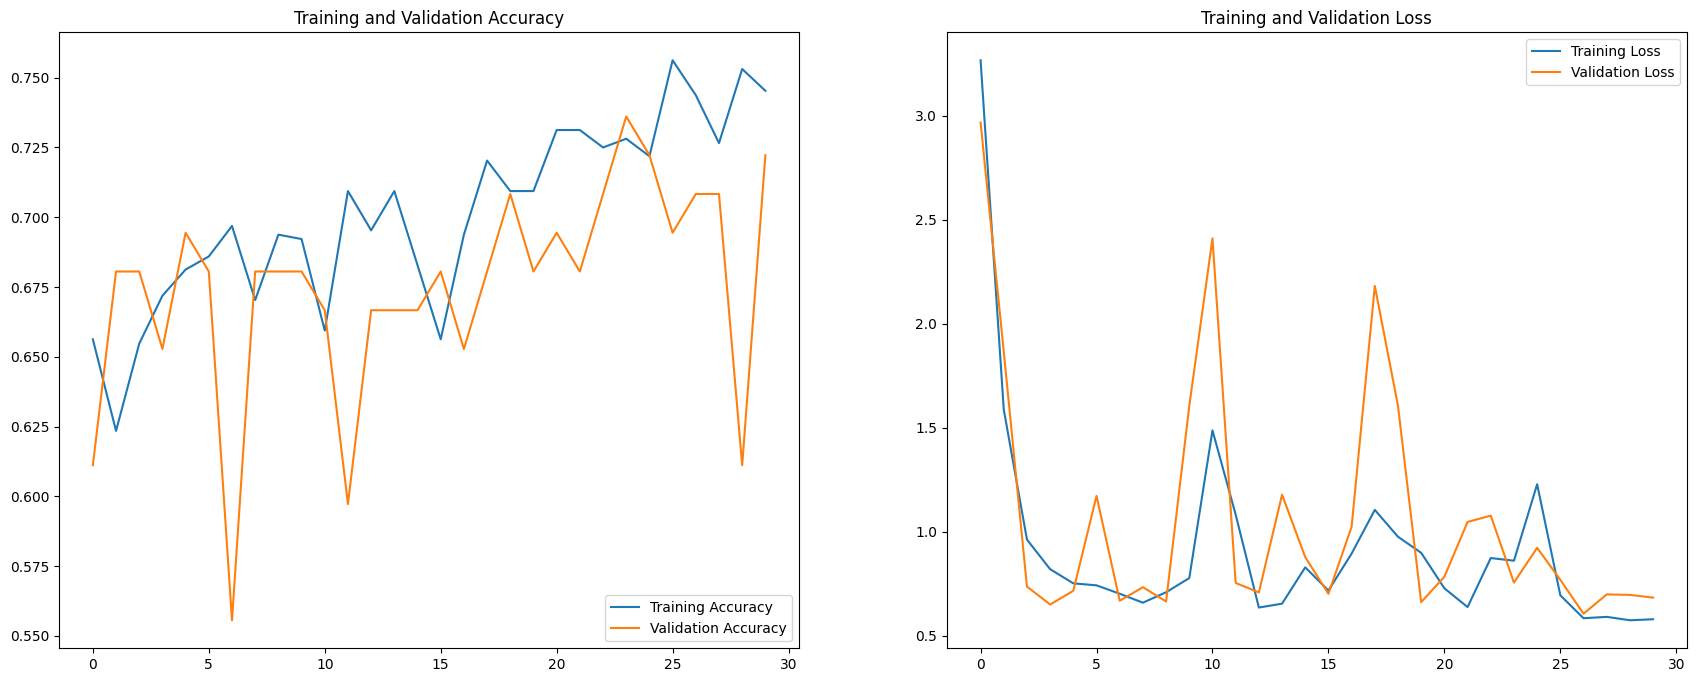

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(21, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# A most simple example of image classification

In [33]:
# load the data 
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

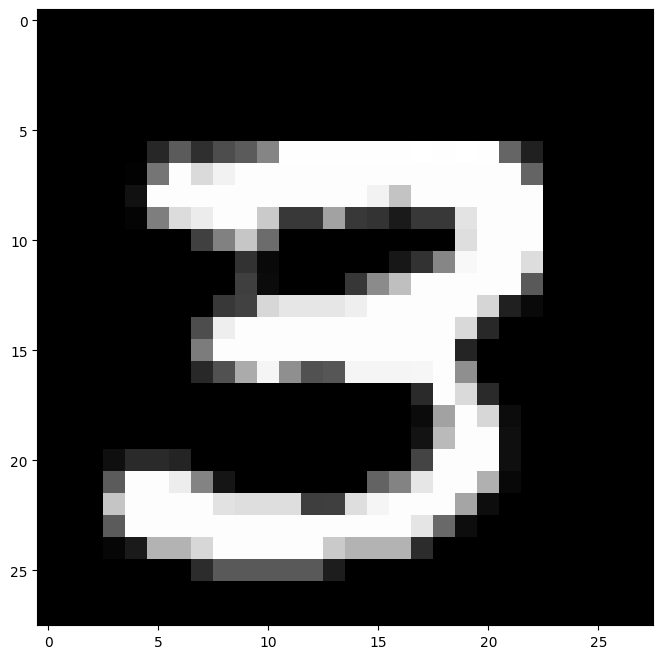

In [26]:
# view some images to make sure everything looks good
# Set the size of our plot
plt.figure(figsize=(8,8))

# Select just one image from 
img = X_train[111]

# Reshape the image to be a 28x28 matrix (original format of image)
img = img.reshape(28,28)

# Plot reshaped image
plt.imshow(img, cmap='gray')

In [34]:
X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape(-1, 28, 28, 1)
y_train = y_train.reshape(-1)

X_test = X_test.reshape(-1, 28, 28, 1)
y_test = y_test.reshape(-1)

# Convolutions
![image](https://i.ytimg.com/vi/bQYBm7XQ8HM/maxresdefault.jpg)
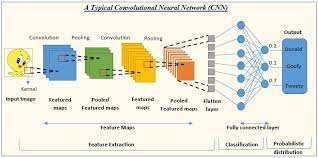

![image](https://miro.medium.com/max/1400/1*bIY_8FE7dJaGk1kjU7iVSg.png)

In [35]:
model = tf.keras.models.Sequential()
# we start with some Conv2D layers alternating with some MaxPool layers
# the filter size increases, I don't know why
# we can add a lot of these chunks of Conv2D and MaxPool, up to 4 groups
model.add(tf.keras.layers.Conv2D(input_shape=(28,28,1), filters=28, kernel_size=(3,3), strides=(1,1), activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=28, kernel_size=(3,3), strides=(1,1), activation="relu"))
model.add(tf.keras.layers.MaxPool2D(2,2))

model.add(tf.keras.layers.Conv2D(filters=28, kernel_size=(3,3), strides=(1,1), activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=28, kernel_size=(3,3), strides=(1,1), activation="relu"))
model.add(tf.keras.layers.MaxPool2D(2,2))

# we then need a flatten layer before going to the Dense layers
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10))

In [36]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [37]:
epochs = 12
model.fit(X_train, y_train, epochs=epochs, validation_split=0.1)

Epoch 1/12
1688/1688 [==============================] - 19s 7ms/step - loss: 2.3344 - acc: 0.1141 - val_loss: 2.3026 - val_acc: 0.1050
Epoch 2/12
1688/1688 [==============================] - 10s 6ms/step - loss: 2.3026 - acc: 0.1134 - val_loss: 2.3026 - val_acc: 0.1050
Epoch 3/12
1688/1688 [==============================] - 9s 5ms/step - loss: 2.3026 - acc: 0.1134 - val_loss: 2.3026 - val_acc: 0.1050
Epoch 4/12
1688/1688 [==============================] - 10s 6ms/step - loss: 2.3026 - acc: 0.1134 - val_loss: 2.3026 - val_acc: 0.1050
Epoch 5/12
1688/1688 [==============================] - 10s 6ms/step - loss: 2.3026 - acc: 0.1134 - val_loss: 2.3026 - val_acc: 0.1050
Epoch 6/12
1688/1688 [==============================] - 10s 6ms/step - loss: 2.3026 - acc: 0.1134 - val_loss: 2.3026 - val_acc: 0.1050
Epoch 7/12
1688/1688 [==============================] - 10s 6ms/step - loss: 2.3026 - acc: 0.1134 - val_loss: 2.3026 - val_acc: 0.1050
Epoch 8/12
1688/1688 [==============================] - 